In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [7]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('/content/data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2



Проверяем формат столбцов

In [12]:
print("Типы данных каждого столбца:")
print(df.dtypes)

Типы данных каждого столбца:
Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [14]:
# Перевод столбца "Дата" в формат datetime
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [15]:
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()
print("Сгруппированные данные по дате:")
print(grouped_df.head())

Сгруппированные данные по дате:
        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Вывести несколько первых строк сгруппированных данных

In [16]:
print("Первые строки сгруппированных данных:")
print(grouped_df.head())

Первые строки сгруппированных данных:
        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

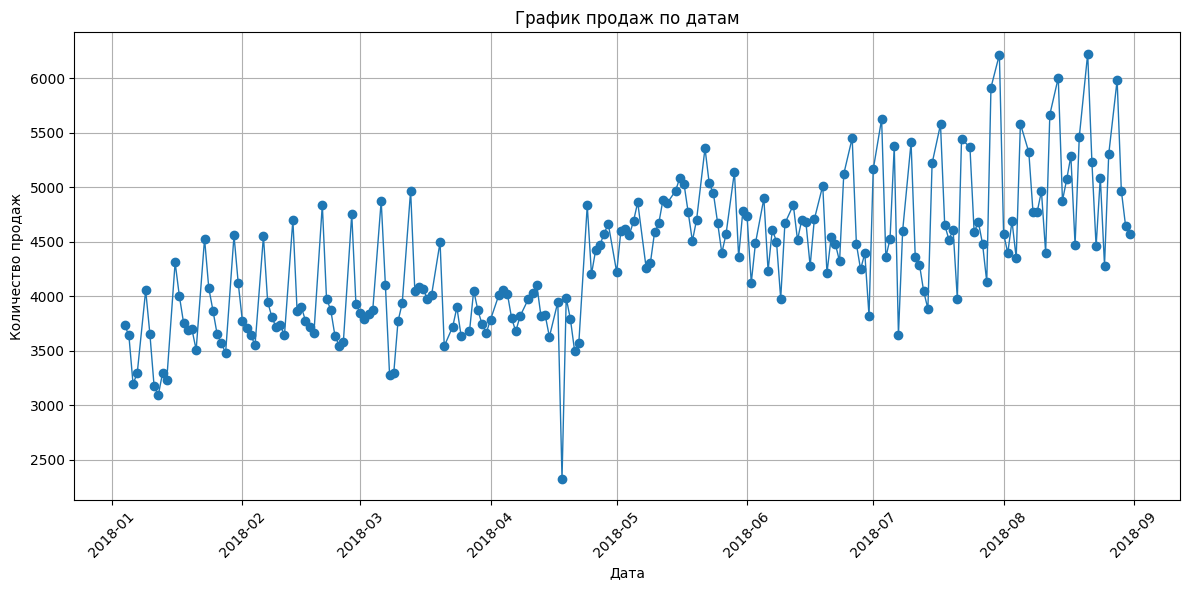

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', linewidth=1)
plt.title('График продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

**На графике видны колебания в количестве продаж по дням. В некоторых датах наблюдаются пики, что может свидетельствовать о сезонных изменениях спроса или проведении акций. Можно заметить общую тенденцию к росту или снижению продаж в зависимости от периода. К примеру между 4 и 5 месяцами мы наблюдаем сильное снижение данных продаж.**

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [19]:
# Поиск выбросов по количеству продаж
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Фильтрация строк с выбросами
outliers = df[df['Количество'] > upper_bound]
max_outlier_row = outliers[outliers['Количество'] == outliers['Количество'].max()]
print("Строка с максимальным выбросом по количеству продаж:")
print(max_outlier_row)

Строка с максимальным выбросом по количеству продаж:
             Дата  Склад   Контрагент Номенклатура  Количество
218822 2018-06-28      1  address_208    product_0         200


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [20]:
# Фильтрация данных по средам за летние месяцы и складу 3
summer_wednesdays = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.dayofweek == 2) & (df['Склад'] == 3)]

# Группировка по номенклатуре и нахождение топового товара
top_product = summer_wednesdays.groupby('Номенклатура')['Количество'].sum().idxmax()
print("Топовый товар по продажам по средам за летние месяцы на складе 3:", top_product)

Топовый товар по продажам по средам за летние месяцы на складе 3: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

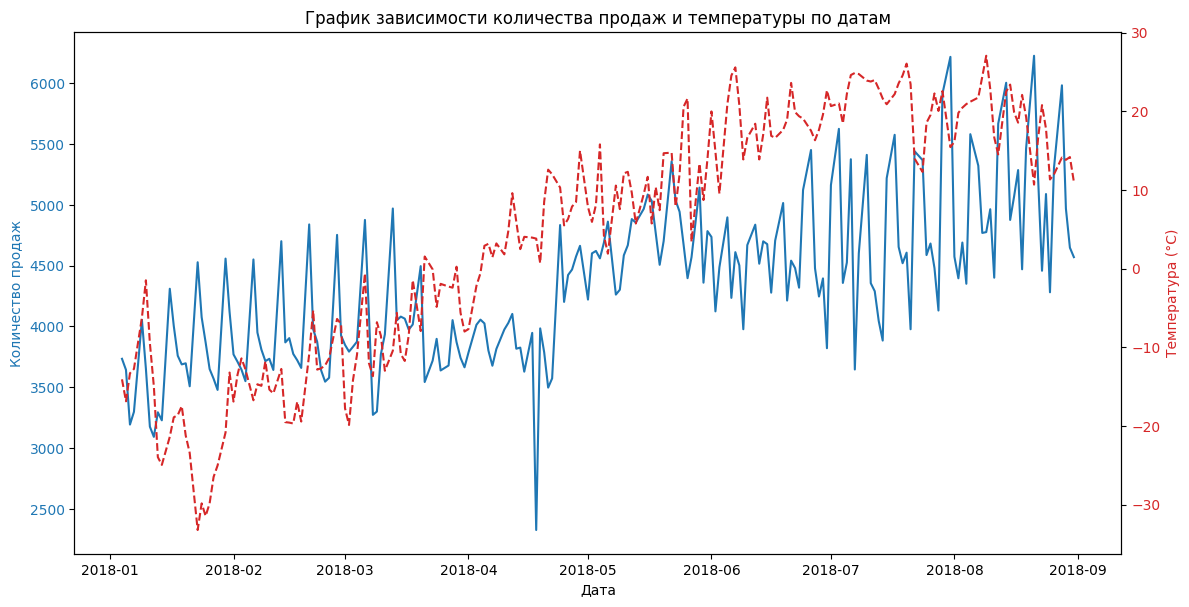

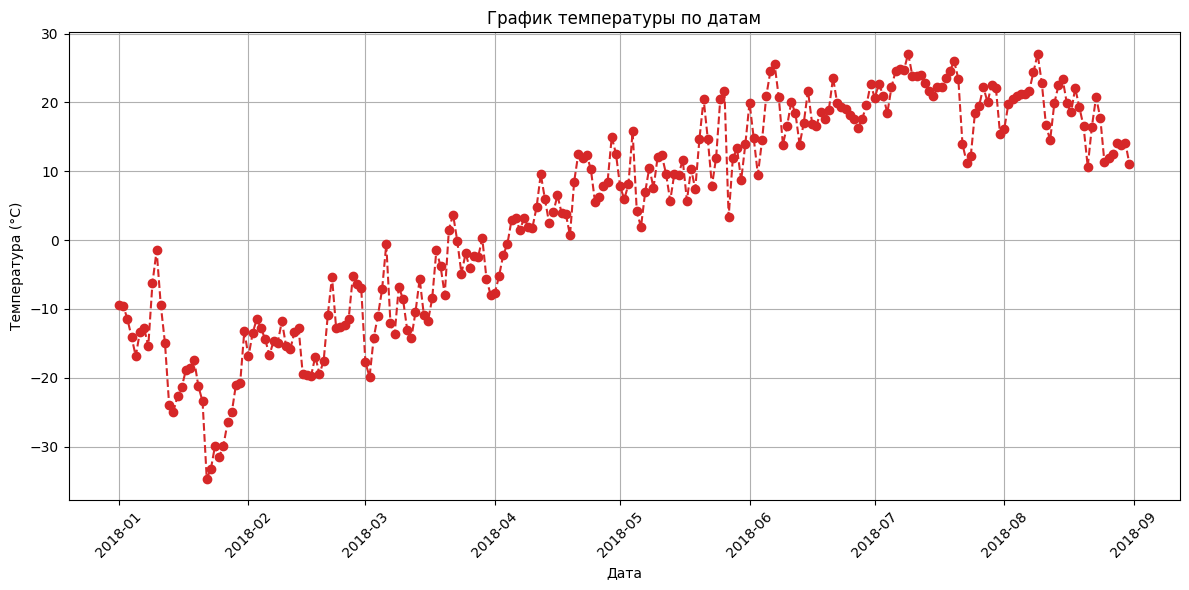

In [82]:
grouped_sales_df = sales_df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()

weather_df = pd.read_excel('/content/excel 2018.xlsx', sheet_name='Архив Погоды rp5', skiprows=6)

weather_df = weather_df[['Местное время в Астане', 'T']]
weather_df.columns = ['Дата', 'Температура']  # Переименовываем столбцы для удобства

# Преобразование столбца "Дата" в формат datetime
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'], format='%d.%m.%Y %H:%M', errors='coerce')

# Удаление строк с некорректными значениями в столбце "Дата"
weather_df = weather_df.dropna(subset=['Дата'])

# Удаление времени из столбца "Дата" для агрегирования по дням
weather_df['Дата'] = weather_df['Дата'].dt.normalize()

# Группировка данных о температуре по дате и усреднение температуры
daily_temperature_df = weather_df.groupby('Дата').agg({'Температура': 'mean'}).reset_index()

# Объединение данных по продажам и температуре на основе даты
merged_df = pd.merge(grouped_sales_df, daily_temperature_df, on='Дата', how='inner')

# Построение графика зависимости количества продаж от температуры
fig, ax1 = plt.subplots(figsize=(12, 6))

# График продаж
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color='tab:blue')
ax1.plot(merged_df['Дата'], merged_df['Количество'], color='tab:blue', label='Продажи')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# График температуры на второй оси Y
ax2 = ax1.twinx()
ax2.set_ylabel('Температура (°C)', color='tab:red')
ax2.plot(merged_df['Дата'], merged_df['Температура'], color='tab:red', linestyle='--', label='Температура')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('График зависимости количества продаж и температуры по датам')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_temperature_df['Дата'], daily_temperature_df['Температура'], color='tab:red', linestyle='--', marker='o')
plt.title('График температуры по датам')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
